In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
credentials = json.load(open('authorization.json'))
client_id = credentials['client_id']
client_secret = credentials['client_secret']

playlist_index = 1

playlists = json.load(open('playlists_like_dislike.json'))
playlist_uri = playlists[playlist_index]['uri']
like = playlists[playlist_index]['like']

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
uri = playlist_uri
username = uri.split(':')[2]
playlist_id = uri.split(':')[4]

In [5]:
results = sp.user_playlist(username, playlist_id, 'tracks')

In [6]:
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

In [7]:
features = sp.audio_features(playlist_tracks_id)

In [8]:
features_df = pd.DataFrame(data=features, columns=features[0].keys())

In [9]:
features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
features_df = features_df[['id', 'title', 'first_artist', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]
features_df.tail()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
95,4cKLB73rkDBmJhj9xLlrMI,Same Team,Alice Merton,[Alice Merton],0.751,0.691,5,-4.855,0,0.1930,0.000001,0.1320,0.494,124.969,211493,4
96,4vUmTMuQqjdnvlZmAH61Qk,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,"[Ed Sheeran, Camila Cabello, Cardi B]",0.857,0.621,9,-6.376,0,0.1480,0.000000,0.0865,0.668,97.989,204467,4
97,0afhq8XCExXpqazXczTSve,Galway Girl,Ed Sheeran,[Ed Sheeran],0.624,0.876,9,-3.374,1,0.0735,0.000000,0.3270,0.781,99.943,170827,4
98,3D5wnLaeVlCCIPzQOOAirA,No Roots,Alice Merton,[Alice Merton],0.863,0.673,4,-6.576,0,0.2580,0.002710,0.0745,0.821,115.952,237053,4
99,7MXlTgQeo3IVlMpLnZuhxc,It's Time,Imagine Dragons,[Imagine Dragons],0.656,0.884,2,-4.748,1,0.0162,0.000000,0.1440,0.860,105.009,240307,4


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Imagine Dragons'),
  Text(1, 0, 'Ed Sheeran'),
  Text(2, 0, 'OneRepublic'),
  Text(3, 0, 'Kygo'),
  Text(4, 0, 'Taylor Swift'),
  Text(5, 0, 'Marshmello'),
  Text(6, 0, 'Charlie Puth'),
  Text(7, 0, 'Wiz Khalifa'),
  Text(8, 0, 'Ellie Goulding'),
  Text(9, 0, 'The Chainsmokers'),
  Text(10, 0, 'Maroon 5'),
  Text(11, 0, 'Jeremy Renner'),
  Text(12, 0, 'Martin Garrix'),
  Text(13, 0, 'Christina Perri'),
  Text(14, 0, 'Coldplay'),
  Text(15, 0, 'Alan Walker'),
  Text(16, 0, 'Sofia Carson'),
  Text(17, 0, 'Steve Aoki'),
  Text(18, 0, 'DJ Snake'),
  Text(19, 0, 'SHAED'),
  Text(20, 0, 'Selena Gomez'),
  Text(21, 0, 'Lil Nas X'),
  Text(22, 0, 'Billie Eilish'),
  Text(23, 0, 'Jon Bellion'),
  Text(24, 0, 'Oh The Larceny'),
  Text(25, 0, 'WAR*HALL'),
  Text(26, 0, 'Sia'),
  Text(27, 0, 'K-391'),
  Text(28, 

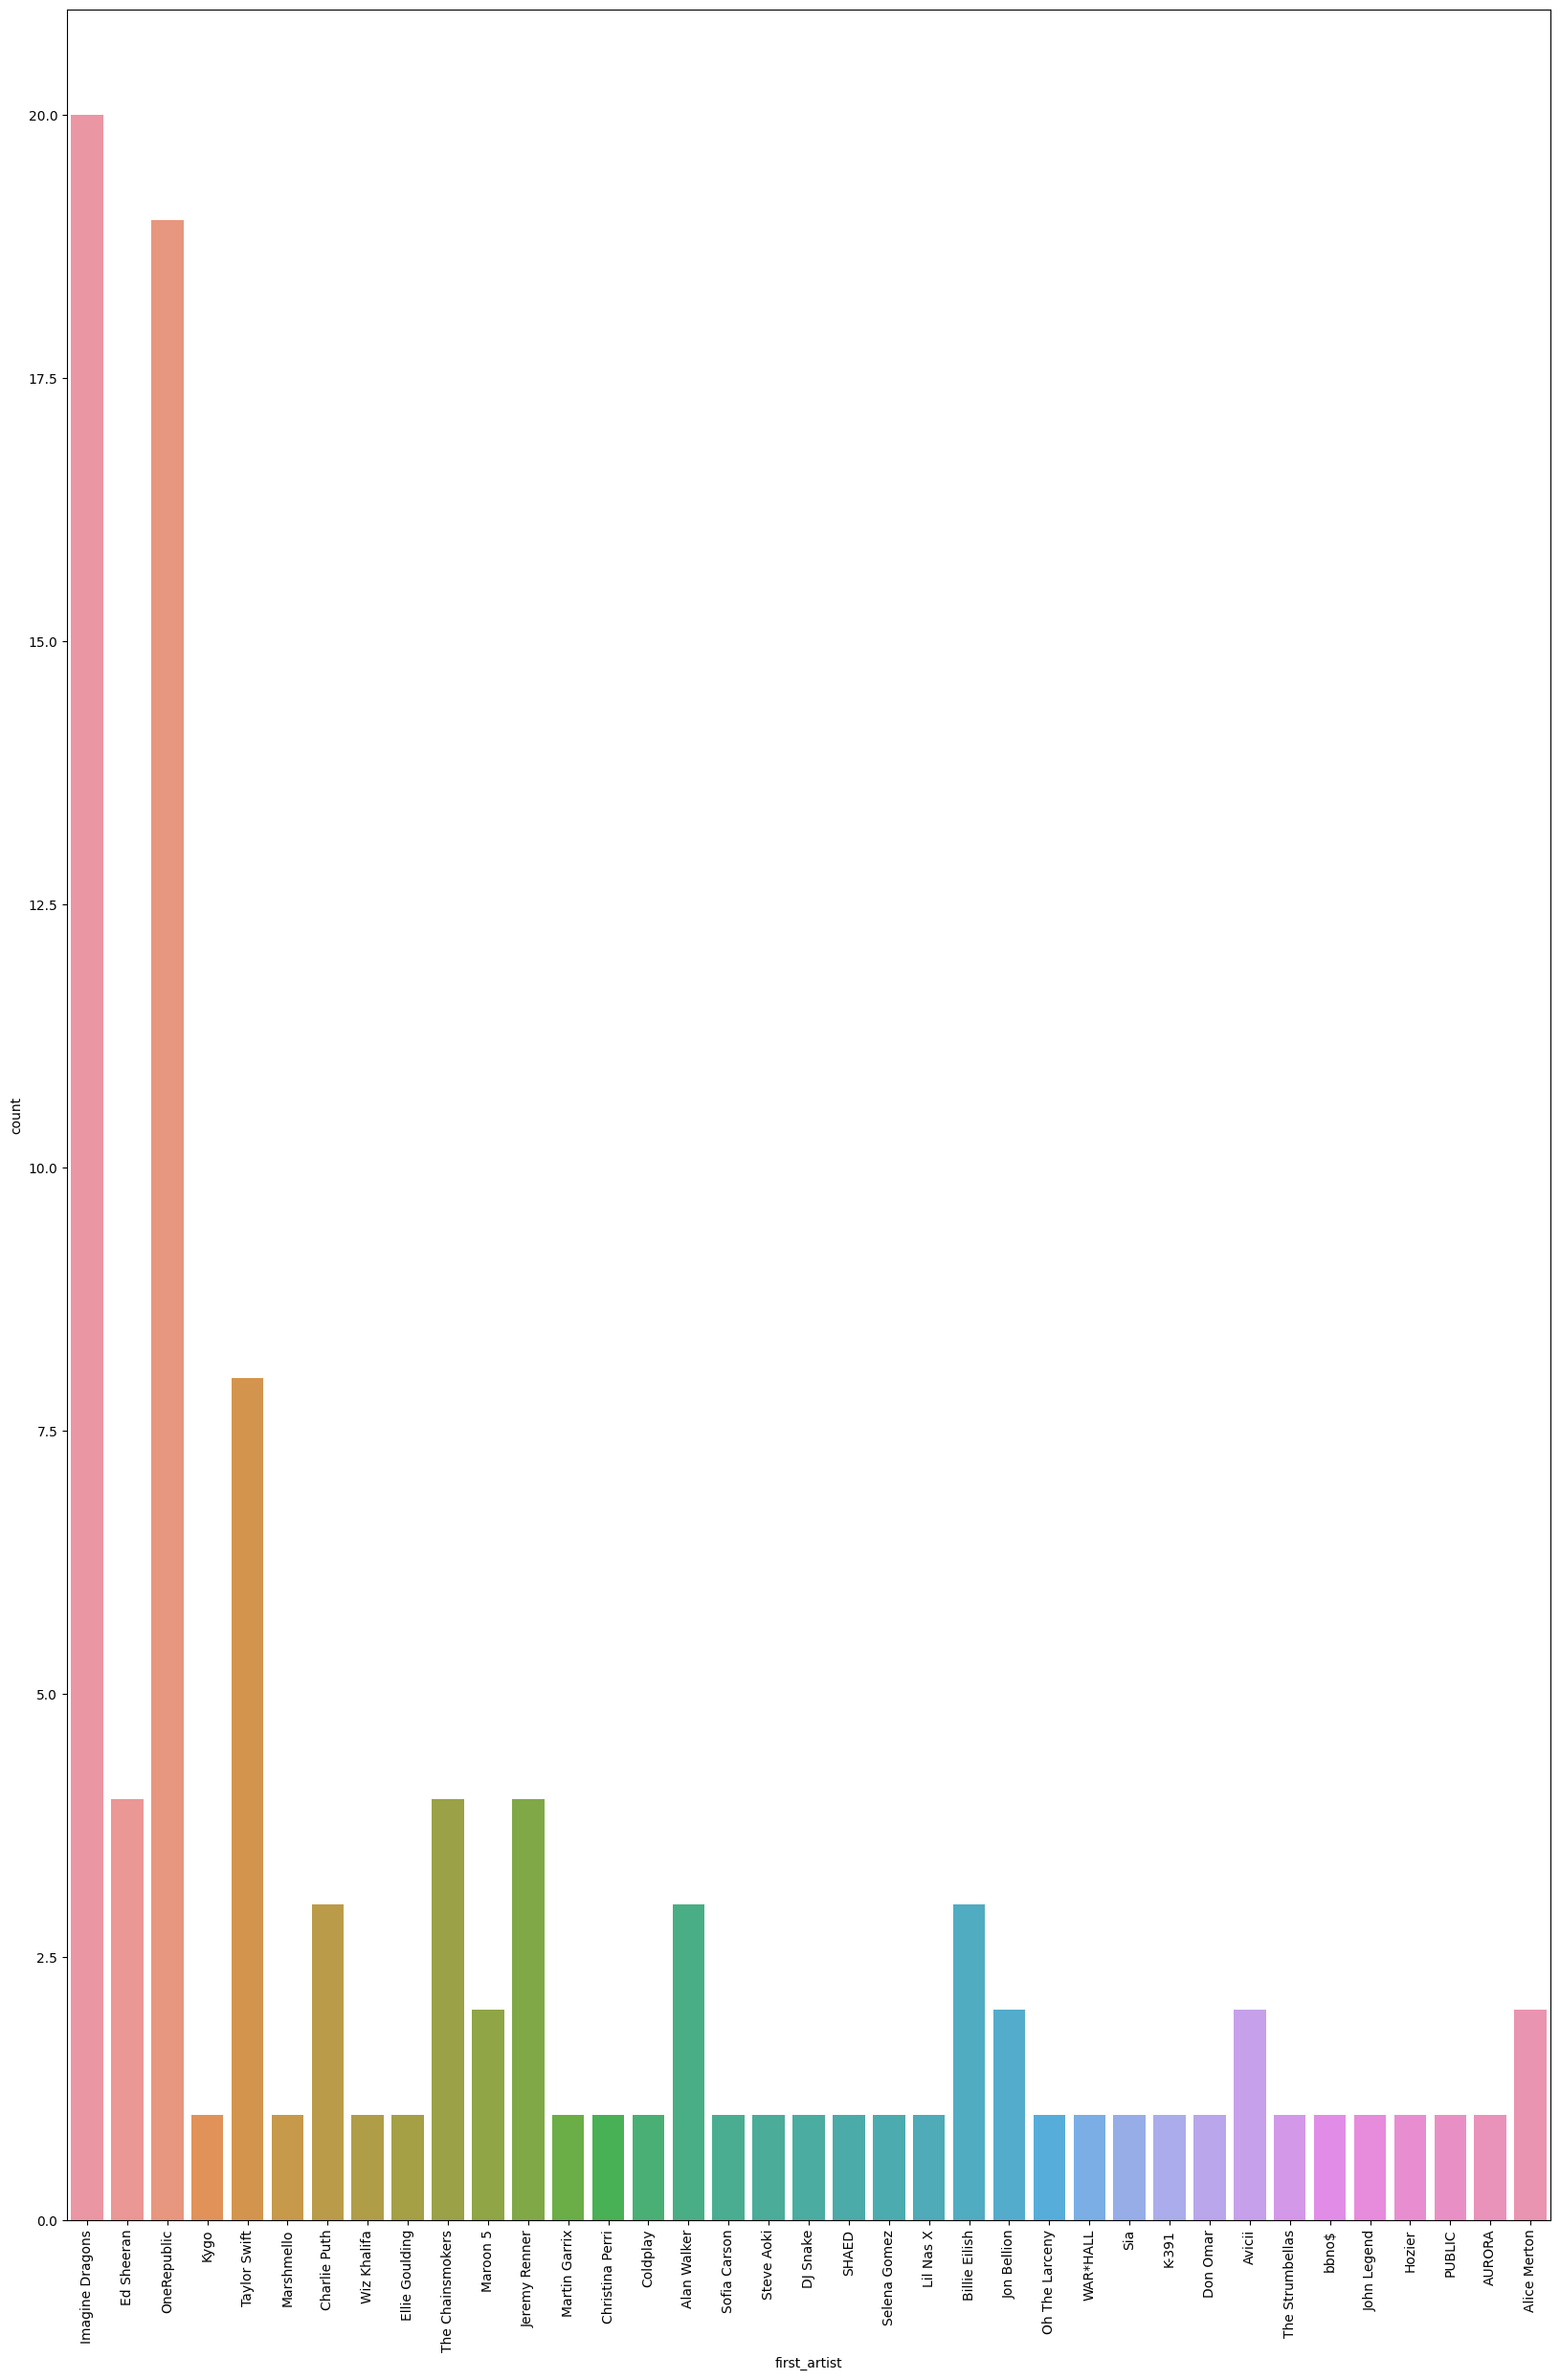

In [10]:
plt.figure(figsize=(20,30))
sns.countplot(x=features_df['first_artist'])
plt.xticks(rotation=90)

In [11]:
features_df = features_df.drop(['first_artist', 'all_artists'], axis=1)


#Spotify Audio Analysis

In [12]:
num_bars = []
num_sections = []
num_segments = []

for i in range(0,len(features_df['id'])):
    analysis = sp.audio_analysis(features_df.iloc[i]['id'])
    num_bars.append(len(analysis['bars'])) 
    num_sections.append(len(analysis['sections']))
    num_segments.append(len(analysis['segments']))

Text(0.5, 0, 'num_segments')

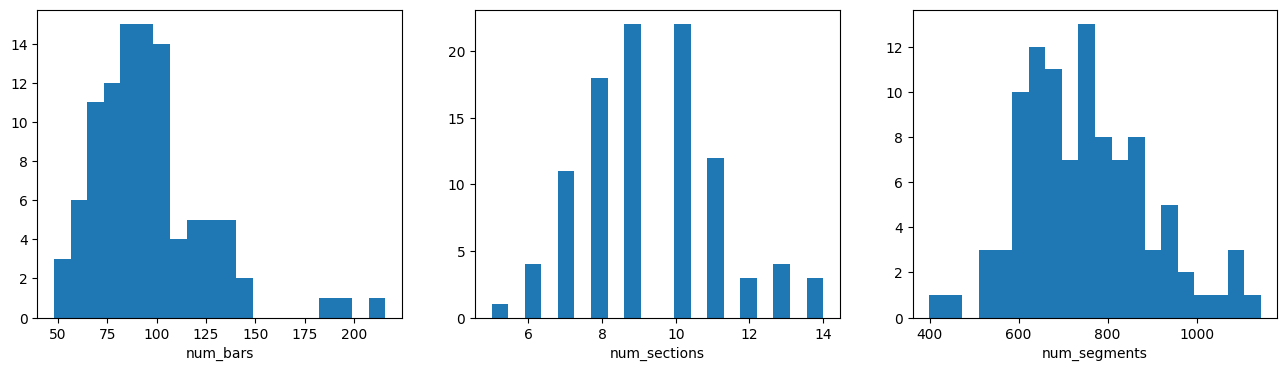

In [13]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(num_bars, bins=20)
plt.xlabel('num_bars')
plt.subplot(1,3,2)
plt.hist(num_sections, bins=20)
plt.xlabel('num_sections')
plt.subplot(1,3,3)
plt.hist(num_segments, bins=20)
plt.xlabel('num_segments')

In [14]:
features_df['num_bars'] = num_bars
features_df['num_sections'] = num_sections
features_df['num_segments'] = num_segments
features_df.head()

,id,title,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,6Qn5zhYkTa37e91HC1D7lb,Whatever It Takes,0.672,0.655,10,-5.021,0,0.03620,0.00000,0.1170,0.556,134.945,201240,4,112,8,756
1,1zB4vmk8tFRmM9UULNzbLB,Thunder,0.605,0.822,0,-4.833,1,0.00671,0.13400,0.1470,0.288,167.997,187147,4,128,10,614
2,7qiZfU4dY1lWllzX7mPBI3,Shape of You,0.825,0.652,1,-3.183,0,0.58100,0.00000,0.0931,0.931,95.977,233713,4,92,9,1062
3,2tpWsVSb9UEmDRxAl1zhX1,Counting Stars,0.664,0.705,1,-4.972,0,0.06540,0.00000,0.1180,0.477,122.016,257267,4,129,8,1001
4,5qaEfEh1AtSdrdrByCP7qR,Demons,0.505,0.710,3,-3.015,1,0.19000,0.00025,0.2690,0.428,89.938,177507,4,65,9,571


In [15]:
features_df.to_csv("playlist_" + str(playlist_index) + ".csv", encoding='utf-8',index="false")